In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s

In [3]:
fs_all = probs_df['Feature set']
fs = ['DNA_1']
for f in fs_all:
    if f != fs[-1]:
        fs.append(f)
fs

['DNA_1',
 'DNA_2',
 'DNA_3',
 'DNA_4',
 'DNA_5',
 'DNA_6',
 'DNA_7',
 'DNA_8',
 'DNA_9',
 'AA_1',
 'AA_2',
 'AA_3',
 'AA_4',
 'PC_1',
 'PC_2',
 'PC_3',
 'PC_4',
 'PC_5',
 'PC_6',
 'Domain_1']

## Heatmaps of main results

In [27]:
resultsfile = 'Bacteria_DNA_results.csv'

results = pd.read_csv(resultsfile)
results.head()

,positive label,label tax group,pool label,pool tax group,Baltimore,N in class,Features,k,AUC,accuracy,specificity,sensitivity,TN/FP/FN/TP
0,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,1,0.864,0.810,0.818,0.8,[9 2 2 8]
1,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,2,0.918,0.905,0.909,0.9,[10 1 1 9]
2,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,3,0.918,0.952,0.909,1.0,[10 1 0 10]
3,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,4,0.936,0.952,0.909,1.0,[10 1 0 10]
4,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,5,0.982,0.952,0.909,1.0,[10 1 0 10]


In [28]:
#df['baltimore']= df.apply(lambda row: row['task'].split('_')[1] , axis=1)
concat_ds = lambda row: f'{row["label tax group"][0]}_vs_{row["pool tax group"][0]} {row["positive label"]}'
results['Dataset']= results.apply(concat_ds , axis=1)

concat_fs = lambda row : f'{row["Features"]}_{row["k"]}'
results['Feature set']= results.apply(concat_fs , axis=1)

In [29]:
tax_order =['p','c','o','f','g','s']
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domain_1']
#ds_list = list(set(results['dataset']))
#df.apply(lambda row: row['task'].split('_')[1] , axis=1)
results['tax'] = results.apply(lambda row: row['Dataset'][0], axis = 1)
results['tax'] = results['tax'].astype('category')
results['tax'].cat.set_categories(tax_order, inplace=True)
results['Feature set'] = results['Feature set'].astype('category')
results['Feature set'].cat.set_categories(fs_order, inplace=True)
#results['Dataset'] = results['Dataset'].astype('category')
#results['Dataset'].cat.set_categories(tax_order, inplace=True)
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 16 columns):
positive label     1337 non-null object
label tax group    1337 non-null object
pool label         1337 non-null object
pool tax group     1337 non-null object
Baltimore          1337 non-null object
N in class         1337 non-null int64
Features           1337 non-null object
k                  1337 non-null int64
AUC                1337 non-null float64
accuracy           1337 non-null float64
specificity        1337 non-null float64
sensitivity        1337 non-null float64
TN/FP/FN/TP        1337 non-null object
Dataset            1337 non-null object
Feature set        1337 non-null category
tax                1337 non-null category
dtypes: category(2), float64(4), int64(2), object(8)
memory usage: 149.9+ KB


### Add a model number

In [30]:
model = 1
model_col =[]
old_label  = 'Alteromonadales' # first label
for i,row in  (results.iterrows()):
    
    label = row['positive label']
    if label != old_label:
        model += 1
        old_label = label
    model_col.append(model)
se =pd.Series(model_col)
results['model'] = se.values

In [31]:
results.head(30)

,positive label,label tax group,pool label,pool tax group,Baltimore,N in class,Features,k,AUC,accuracy,specificity,sensitivity,TN/FP/FN/TP,Dataset,Feature set,tax,model
0,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,1,0.864,0.810,0.818,0.800,[9 2 2 8],o_vs_c Alteromonadales,DNA_1,o,1
1,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,2,0.918,0.905,0.909,0.900,[10 1 1 9],o_vs_c Alteromonadales,DNA_2,o,1
2,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,3,0.918,0.952,0.909,1.000,[10 1 0 10],o_vs_c Alteromonadales,DNA_3,o,1
3,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,4,0.936,0.952,0.909,1.000,[10 1 0 10],o_vs_c Alteromonadales,DNA_4,o,1
4,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,5,0.982,0.952,0.909,1.000,[10 1 0 10],o_vs_c Alteromonadales,DNA_5,o,1
5,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,6,0.973,0.952,0.909,1.000,[10 1 0 10],o_vs_c Alteromonadales,DNA_6,o,1
6,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,7,0.909,0.905,0.909,0.900,[10 1 1 9],o_vs_c Alteromonadales,DNA_7,o,1
7,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,8,0.955,0.905,0.909,0.900,[10 1 1 9],o_vs_c Alteromonadales,DNA_8,o,1
8,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,9,0.955,0.905,0.909,0.900,[10 1 1 9],o_vs_c Alteromonadales,DNA_9,o,1
9,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,AA,1,0.990,0.900,0.909,0.889,[10 1 1 8],o_vs_c Alteromonadales,AA_1,o,1


p 5
728.4
c 5
114.6
o 10
187.4
f 12
92.1
g 21
126.6
s 14
106.8


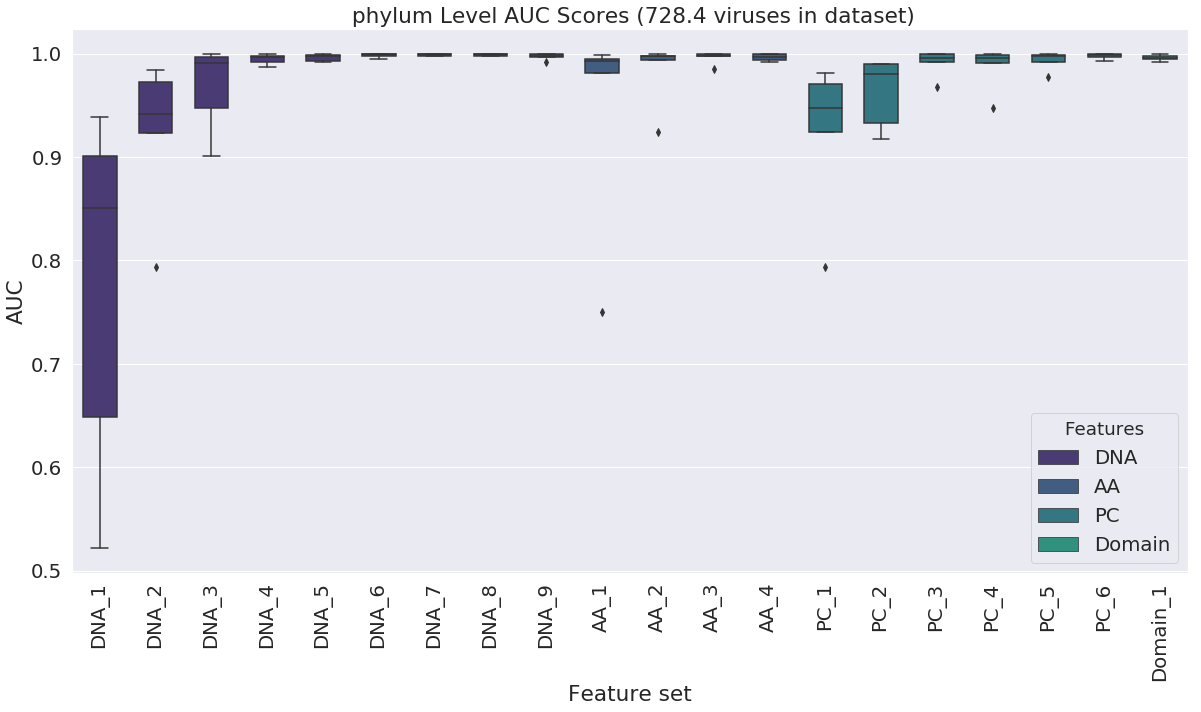

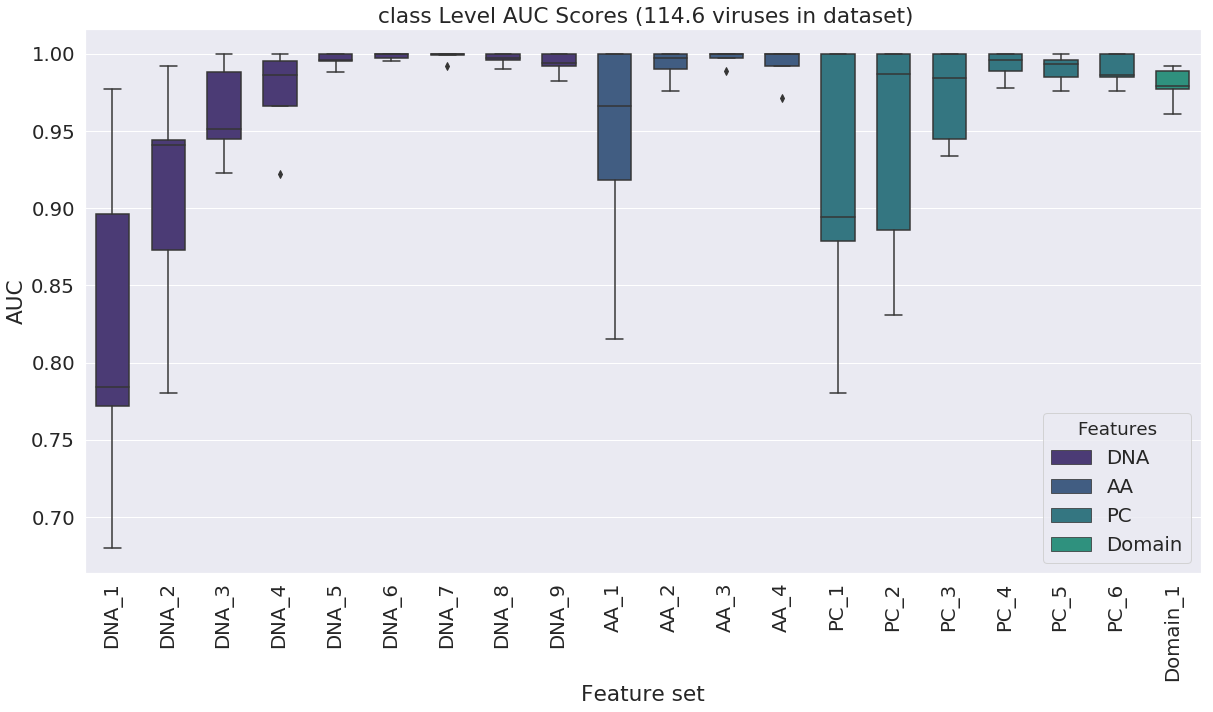

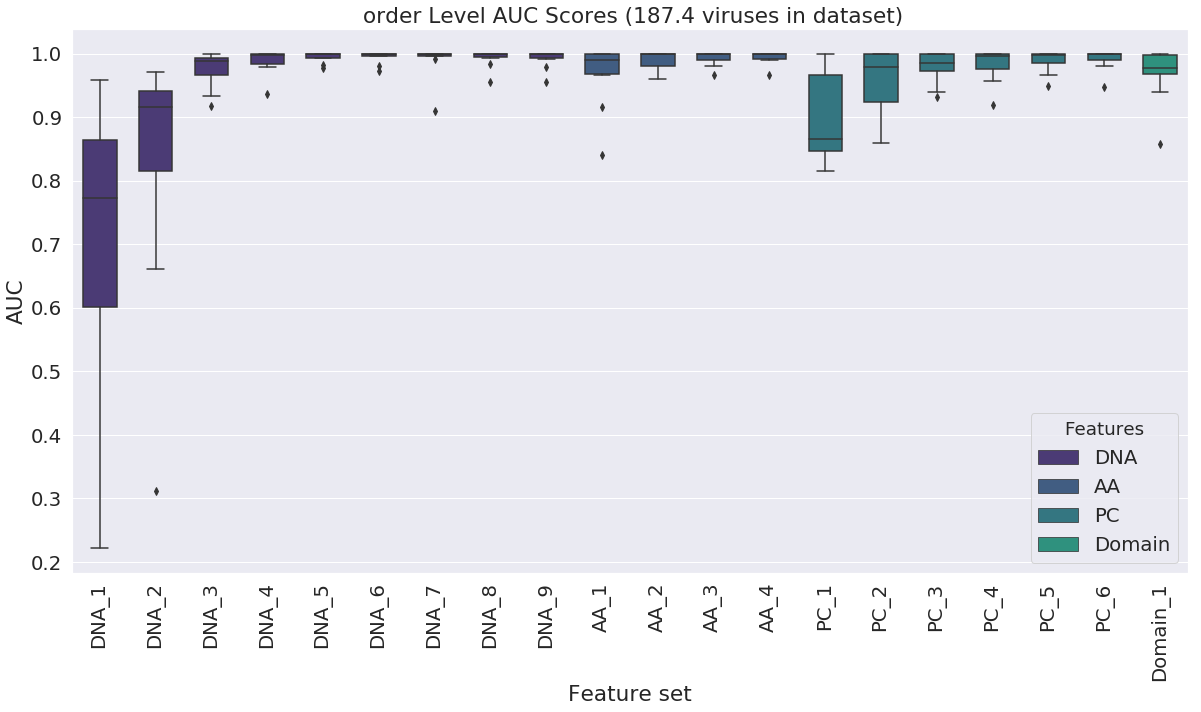

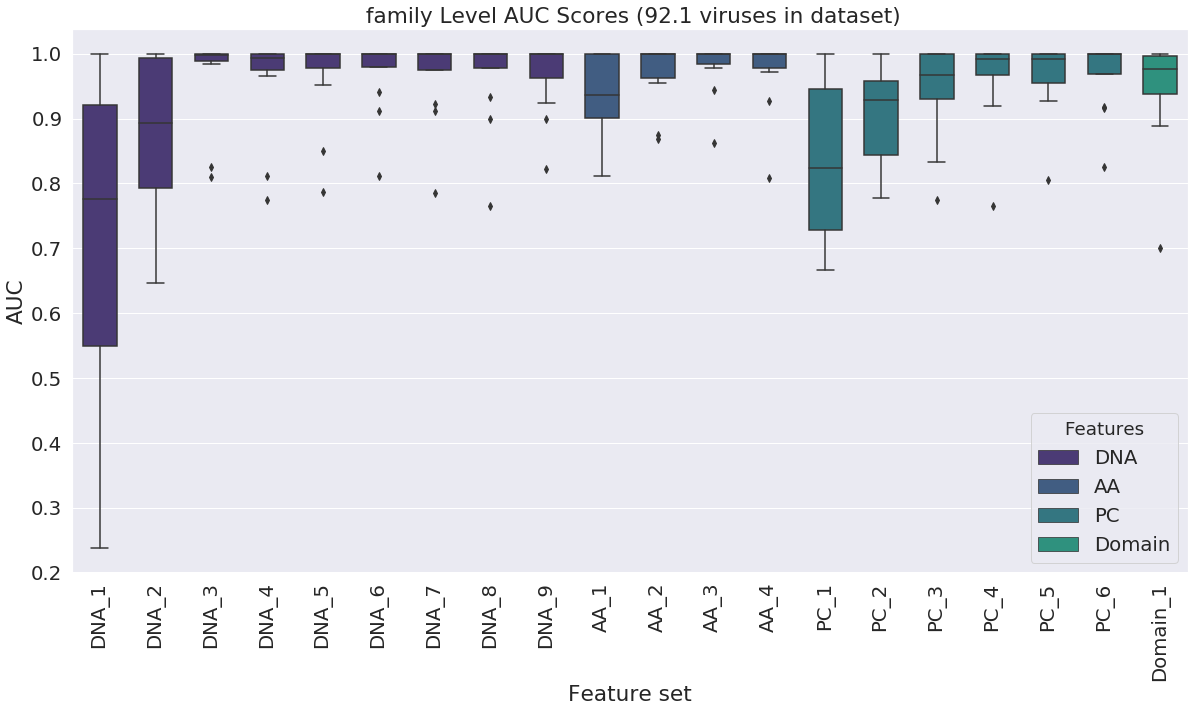

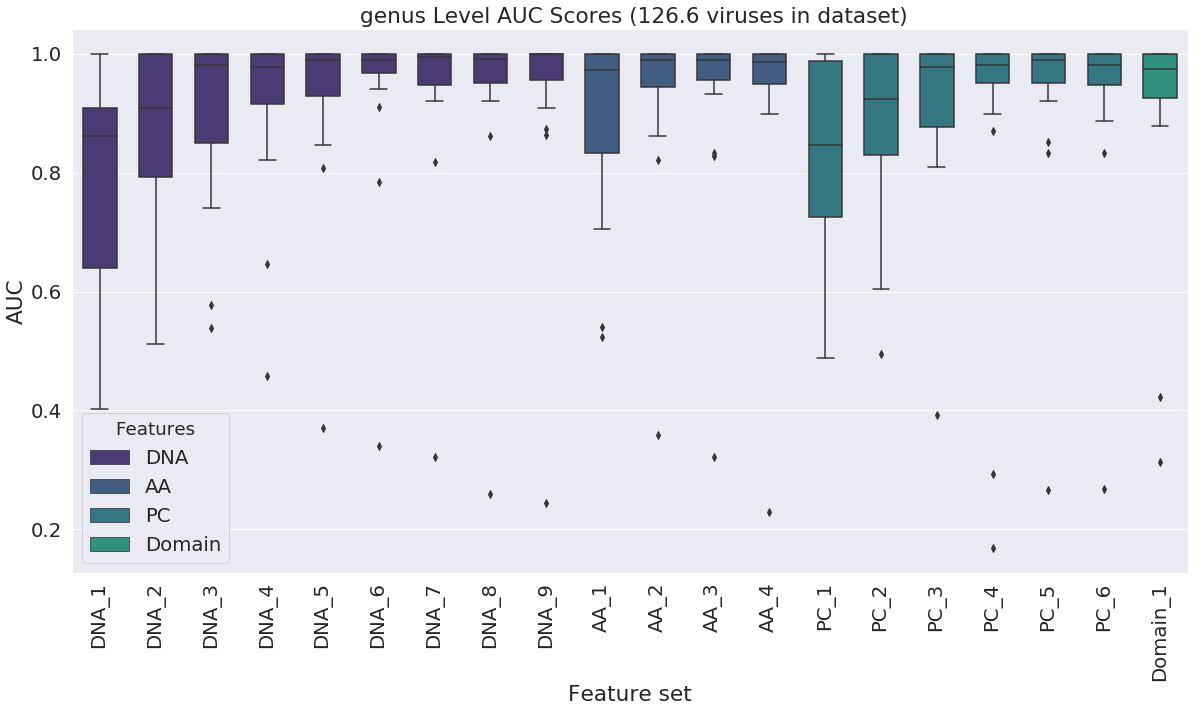

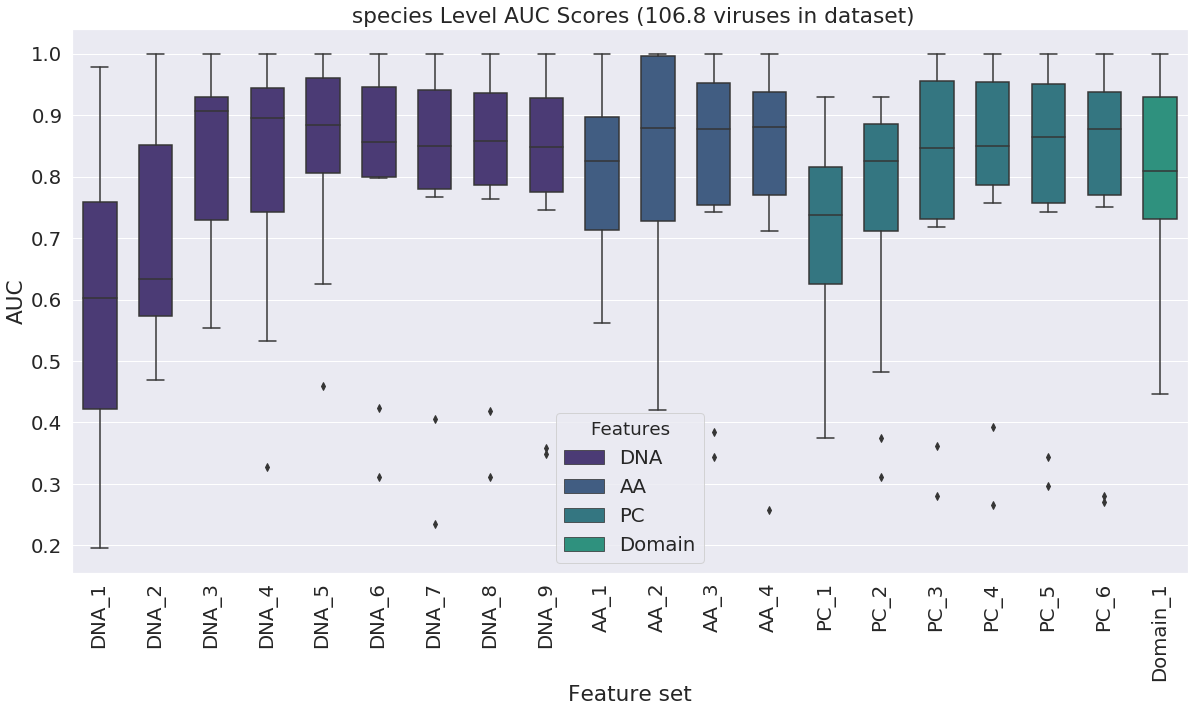

In [51]:
taxlevels = ['phylum','class','order','family','genus','species']
for i, t in enumerate(taxlevels):
    
    ss= results[results.tax == t[0]]
    nds =len(set(ss['Dataset']))
    #print(round(s.mean(list(set(ss['N in class']))),1))
    

    results_p = results[results.tax == t[0]]
    n =round(s.mean(list(set(ss['N in class']))),1)
    sns.set(font_scale=1.8, palette = 'viridis')
    #grid.map(sns.boxplot, x='Feature set',y= "AUC",hue = "k" ,saturation =1,  width =0.9, data = results)
    f, ax = plt.subplots(figsize=(20, 10))
    plt.xticks(rotation='vertical')
    plt.title(f' {taxlevels[i]} Level AUC Scores ({n} viruses in dataset)')
    b = sns.boxplot( x = 'Feature set', y ='AUC', hue = 'Features',width =0.6,linewidth =1.5,dodge = False, 
                ax =ax, data = results_p)

# sp = sns.swarmplot(data = results_p,x = 'Feature set',
#                      y = 'AUC',hue = 'Features',
#                     size = 3, dodge = True)

    f.savefig(f'Figures/{taxlevels[i]}_bxplt_Bact_DNA.png')

p
100
c
100
o
199
f
239
g
420
s
279


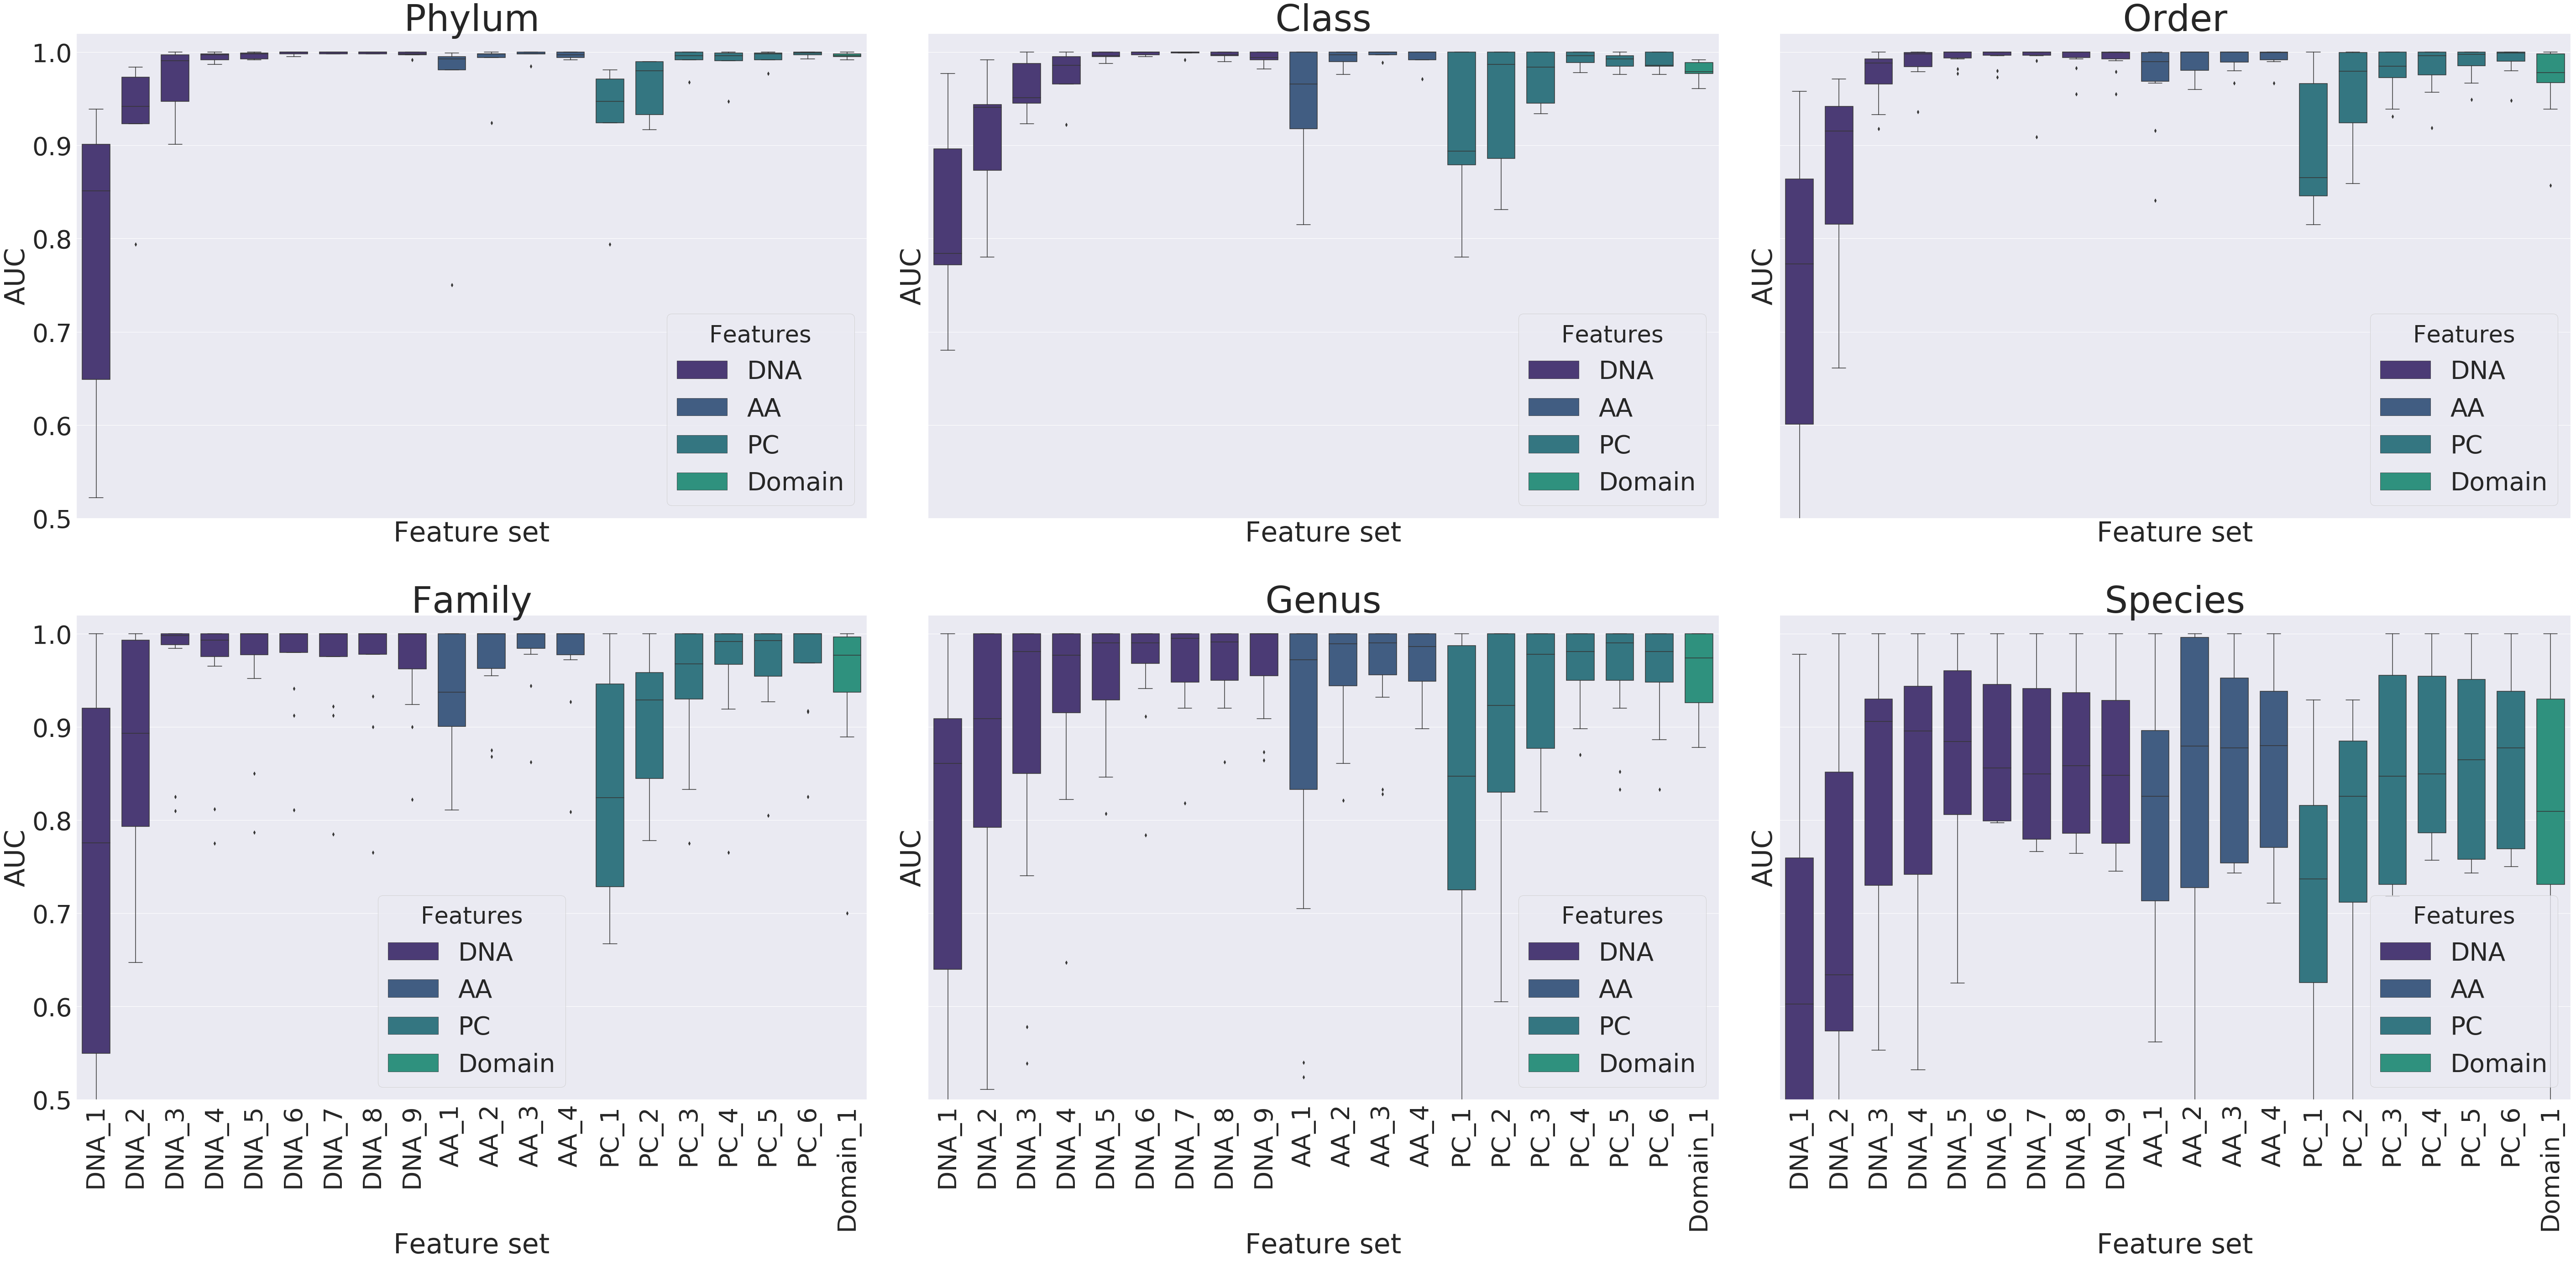

In [185]:
sns.set(font_scale=5, palette = 'viridis' )
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(80, 40),sharex=True, sharey=True,)
taxlevels = ['phylum','class','order','family','genus','species']
#for i, t in enumerate(taxlevels):
for i, ax in enumerate(axes.flat):  
    print(taxlevels[i][0])
    ss= results[results.tax == taxlevels[i][0]]
    nds =len(set(ss['Dataset']))
    #print(round(s.mean(list(set(ss['N in class']))),1))
    
    print (len(ss))
    
    n =round(s.mean(list(set(ss['N in class']))),1)
    
    #grid.map(sns.boxplot, x='Feature set',y= "AUC",hue = "k" ,saturation =1,  width =0.9, data = results)
    #ax. subplots(figsize=(20, 10))
    plt.sca(ax)
    plt.xticks(rotation='vertical')
    
    #plt.title(f' {taxlevels[i].capitalize()} Level AUC Scores ({n})')
    ax.set_title(f' {taxlevels[i].capitalize()} ',fontsize= 80)
    b =sns.boxplot( x = 'Feature set', y ='AUC', hue = 'Features',width =0.7,linewidth =1.5,dodge = False, 
                ax =ax,  data = ss)
    #ax.set_xlabel(fontsize= 30)
    ax.set_ylim([0.5, 1.02])
   # ax.tick_params(labelbottom = False, top= False, bottom=False, left=False, right=False)
# ax.xlabel("Feature set")
# axes.ylabel("AUC")
fig.tight_layout()
plt.subplots_adjust(hspace = 0.2)
fig.savefig(f'Figures/{taxlevels[i]}_bxplt_Bact_DNA.png', transparent=True)

In [189]:
results.head(50)

,positive label,label tax group,pool label,pool tax group,Baltimore,N in class,Features,k,AUC,accuracy,specificity,sensitivity,TN/FP/FN/TP,Dataset,Feature set,tax,model
0,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,1,0.864,0.810,0.818,0.800,[9 2 2 8],o_vs_c Alteromonadales,DNA_1,o,1
1,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,2,0.918,0.905,0.909,0.900,[10 1 1 9],o_vs_c Alteromonadales,DNA_2,o,1
2,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,3,0.918,0.952,0.909,1.000,[10 1 0 10],o_vs_c Alteromonadales,DNA_3,o,1
3,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,4,0.936,0.952,0.909,1.000,[10 1 0 10],o_vs_c Alteromonadales,DNA_4,o,1
4,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,5,0.982,0.952,0.909,1.000,[10 1 0 10],o_vs_c Alteromonadales,DNA_5,o,1
5,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,6,0.973,0.952,0.909,1.000,[10 1 0 10],o_vs_c Alteromonadales,DNA_6,o,1
6,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,7,0.909,0.905,0.909,0.900,[10 1 1 9],o_vs_c Alteromonadales,DNA_7,o,1
7,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,8,0.955,0.905,0.909,0.900,[10 1 1 9],o_vs_c Alteromonadales,DNA_8,o,1
8,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,DNA,9,0.955,0.905,0.909,0.900,[10 1 1 9],o_vs_c Alteromonadales,DNA_9,o,1
9,Alteromonadales,order,Gammaproteobacteria,class,DNA,45,AA,1,0.990,0.900,0.909,0.889,[10 1 1 8],o_vs_c Alteromonadales,AA_1,o,1


In [ ]:
df = results.pivot( 'Dataset','Feature set', 'AUC')

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 20))
plt.xticks(rotation='vertical')
sns.heatmap(df,cmap = 'viridis', vmin = 0.5,   ax=ax)

In [191]:
dfn  =  results[~(results['pool tax group'].isin(['superkingdom'])) ]

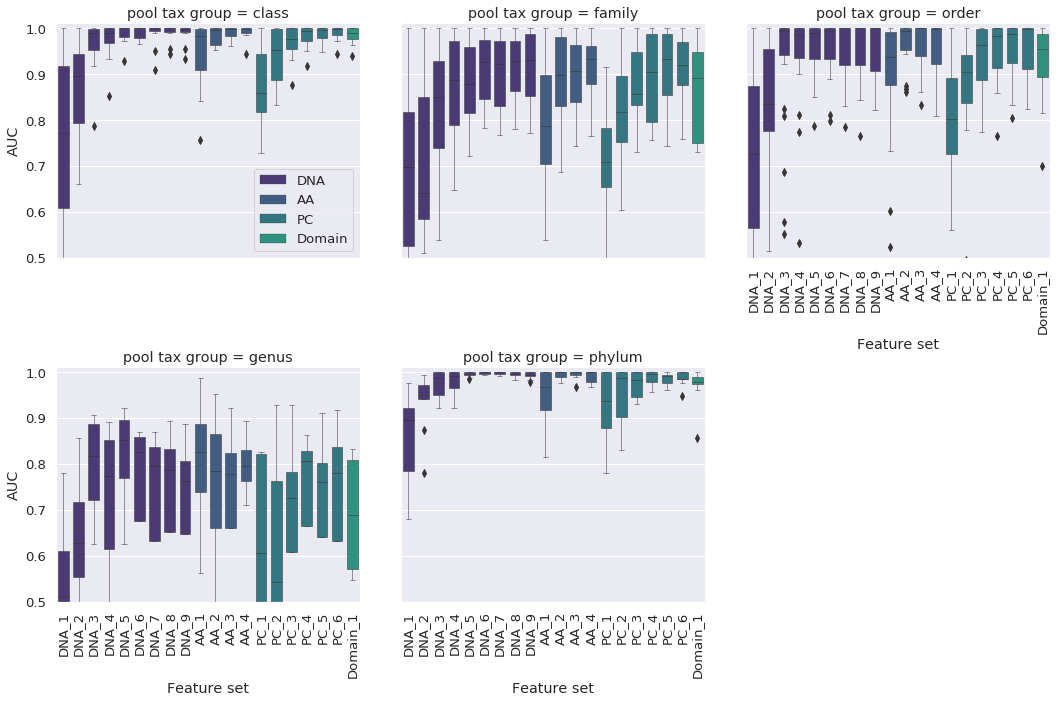

In [193]:
sns.set(font_scale=1.2, palette = 'viridis')
grid = sns.catplot(x = 'Feature set', y ='AUC', hue = 'Features', width =0.7,linewidth = 0.5, dodge = False, 
             data = dfn, col="pool tax group", col_wrap=3 ,kind = 'box' ,margin_titles=True,legend_out = False,
                 )


#f, ax = plt.subplots(figsize=(20, 15))
plt.xticks(rotation='vertical')
grid.add_legend();

# Adjust the tick positions and labels
(grid.set_xticklabels  (rotation='vertical')
         #.set_titles(f' {taxlevels[i].capitalize()} ',fontsize= 50)
         .set(ylim =(0.5, 1.01)))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=2)
#grid.savefig('fig1.1.png')

In [ ]:
                 kind="bar", ci=None, aspect=.6)
>>> (g.set_axis_labels("", "Survival Rate")
...   .set_xticklabels(["Men", "Women", "Children"])
...   .set_titles("{col_name} {col_var}")
...   .set(ylim=(0, 1))
...   .despine(left=True))  

In [194]:
concat_ds = lambda row: f'{row["label tax group"][0]} {row["positive label"]}'
results['Dataset']= results.apply(concat_ds , axis=1)

### Sort the dataset order

In [195]:
concat_ds = lambda row: f'{row["label tax group"][0]} {row["positive label"]}'
results['Dataset']= results.apply(concat_ds , axis=1)

df1 = results.sort_values('tax')
unique =[]
[unique.append(ds) for ds in(list(df1['Dataset']))if ds not in unique ]
unique

['p Bacteroidetes',
 'p Proteobacteria',
 'p Actinobacteria',
 'p Firmicutes',
 'p Cyanobacteria',
 'c Alphaproteobacteria',
 'c Bacilli',
 'c Betaproteobacteria',
 'c Gammaproteobacteria',
 'c Clostridia',
 'o Corynebacteriales',
 'o Synechococcales',
 'o Rhizobiales',
 'o Burkholderiales',
 'o Lactobacillales',
 'o Clostridiales',
 'o Bacillales',
 'o Alteromonadales',
 'o Enterobacterales',
 'o Pseudomonadales',
 'f Erwiniaceae',
 'f Propionibacteriaceae',
 'f Bacillaceae',
 'f Enterobacteriaceae',
 'f Vibrionaceae',
 'f Listeriaceae',
 'f Mycobacteriaceae',
 'f Lactobacillaceae',
 'f Flavobacteriaceae',
 'f Burkholderiaceae',
 'f Streptococcaceae',
 'f Moraxellaceae',
 'g Klebsiella',
 'g Mycolicibacterium',
 'g Enterococcus',
 'g Clostridium',
 'g Escherichia',
 'g Prochlorococcus',
 'g Salmonella',
 'g Propionibacterium',
 'g Cellulophaga',
 'g Mycobacterium',
 'g Gordonia',
 'g Staphylococcus',
 'g Listeria',
 'g Bacillus',
 'g Acinetobacter',
 'g Vibrio',
 'g Burkholderia',
 'g

In [196]:
df = df1.pivot('Dataset','Feature set', 'AUC')
df2 = df.reindex(unique)
#df =df2.transpose()

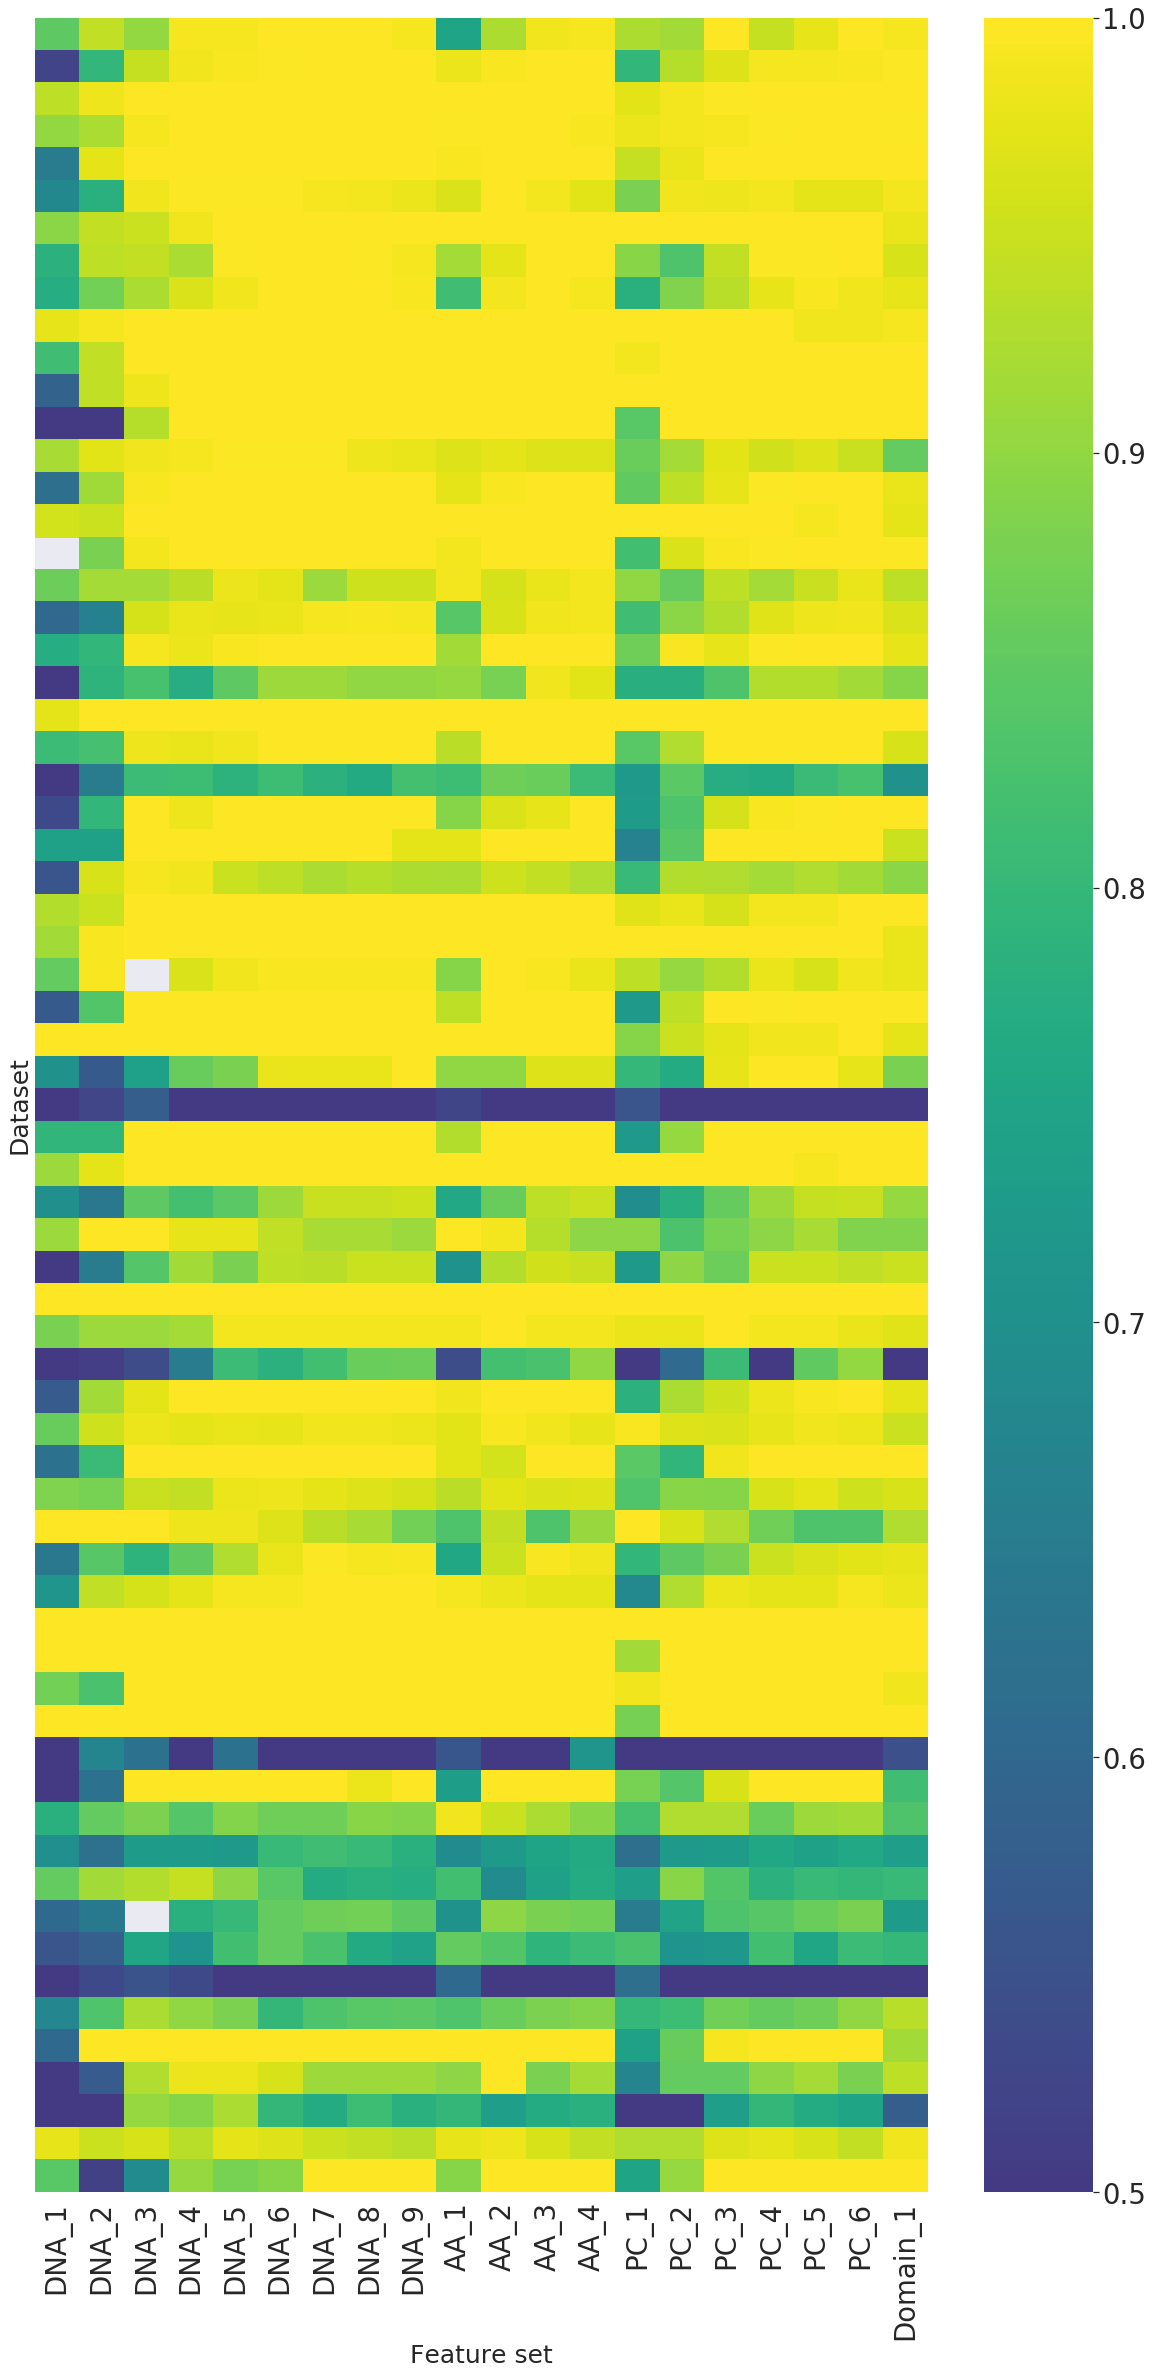

In [201]:
# Draw a heatmap with the numeric values in each cell
sns.set(font_scale=2.5)
f, ax = plt.subplots(figsize=(20, 40))
ax.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    right=False,      # ticks along the bottom edge are off
     left=False,         # ticks along the top edge are off
    labelleft=False
    )
ax.set_ylabel(ax.get_ylabel(), fontsize=25)
ax.set_xlabel(ax.get_xlabel(), fontsize=25)

sns.heatmap(df2,cmap = 'viridis',center =0.7, vmin = 0.5,   ax=ax)
f.savefig('Figures/heatmap_Bact.svg', bbox_inches="tight")

In [202]:
f.savefig('Figures/heatmap_Bact.png', bbox_inches="tight")